In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import gmaps
from citipy import citipy

from config import weather_api_key
from config import g_key

from datetime import datetime
from scipy.stats import linregress

import timeit  # to check how long a code or function takes to run

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# 6.1.5
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

Get the City Weather Data

In [5]:
# 6.2.6
 
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&lat=&lon=&appid=" + weather_api_key


# Create an empty list to hold the weather data
city_data = []


# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1


    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind                        
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | quatre cocos
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | umm kaddadah
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | savona
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | auki
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | tiarei
Processing Record 13 of Set 1 | lasa
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | rocha
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | morondava
Pro

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-06-07 12:29:07,64.3833,-173.3000,43.41,70,61,2.71
1,Albany,US,2022-06-07 12:26:58,42.6001,-73.9662,67.78,54,95,1.01
2,Quatre Cocos,MU,2022-06-07 12:29:08,-20.2078,57.7625,76.08,74,82,11.18
3,Bredasdorp,ZA,2022-06-07 12:29:08,-34.5322,20.0403,82.51,18,10,6.20
4,Umm Kaddadah,SD,2022-06-07 12:29:09,13.6017,26.6876,104.23,8,73,17.47
5,Savona,IT,2022-06-07 12:27:51,44.3000,8.2667,81.52,68,74,4.85
6,Mataura,NZ,2022-06-07 12:29:09,-46.1927,168.8643,50.49,94,30,2.98
7,Auki,SB,2022-06-07 12:29:10,-8.7676,160.7034,77.25,84,63,5.12
8,Nikolskoye,RU,2022-06-07 12:29:10,59.7035,30.7861,69.87,28,9,5.93
9,Tiarei,PF,2022-06-07 12:29:11,-17.5333,-149.3333,73.42,75,26,14.67


In [7]:
# re-arrange the columns

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [8]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-06-07 12:29:07,64.3833,-173.3000,43.41,70,61,2.71
1,Albany,US,2022-06-07 12:26:58,42.6001,-73.9662,67.78,54,95,1.01
2,Quatre Cocos,MU,2022-06-07 12:29:08,-20.2078,57.7625,76.08,74,82,11.18
3,Bredasdorp,ZA,2022-06-07 12:29:08,-34.5322,20.0403,82.51,18,10,6.20
4,Umm Kaddadah,SD,2022-06-07 12:29:09,13.6017,26.6876,104.23,8,73,17.47
5,Savona,IT,2022-06-07 12:27:51,44.3000,8.2667,81.52,68,74,4.85
6,Mataura,NZ,2022-06-07 12:29:09,-46.1927,168.8643,50.49,94,30,2.98
7,Auki,SB,2022-06-07 12:29:10,-8.7676,160.7034,77.25,84,63,5.12
8,Nikolskoye,RU,2022-06-07 12:29:10,59.7035,30.7861,69.87,28,9,5.93
9,Tiarei,PF,2022-06-07 12:29:11,-17.5333,-149.3333,73.42,75,26,14.67


In [9]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

creating a series of scatter plots for each weather parameter

In [24]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

1. Latitude vs. Maximum Temperature

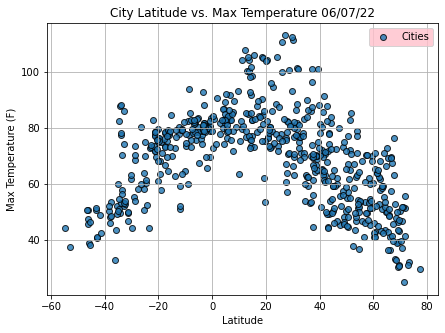

In [25]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.figure(figsize=(7, 5))
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend(facecolor='pink')


# Save the figure
plt.savefig("weather_data/Fig1.png")


# Show plot
plt.show()

2. Latitude vs. Humidity

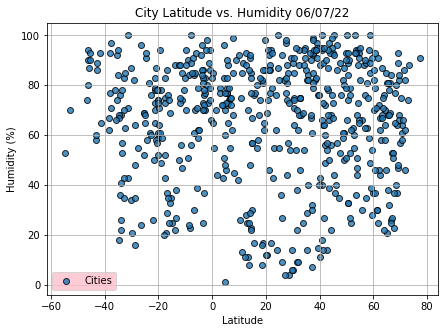

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(7, 5))
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend(facecolor='pink')

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

3. Latitude vs. Cloudiness

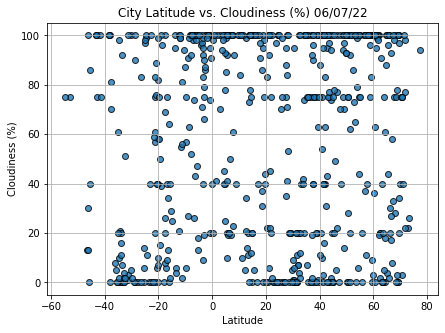

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(7, 5))
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#plt.legend(facecolor='pink', loc='right')

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

4. Latitude vs. Wind Speed

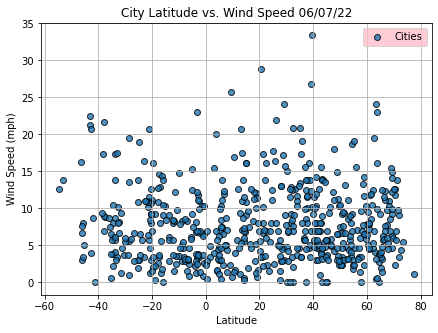

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(7, 5))
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend(facecolor='pink')

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

Generate a regression line for latitude and maximum temperature for the Northern and Southern Hemispheres

In [29]:
# Import linregress
from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")

    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()    

In [15]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

for the Northern Hemisphere

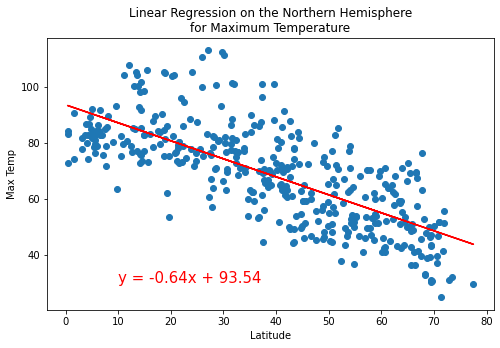

In [16]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# Call the function
plt.figure(figsize=(8, 5))
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp', (10,30))

for the Southern Hemisphere

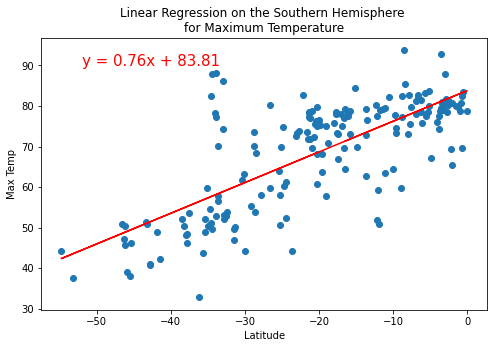

In [17]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


# Call the function
plt.figure(figsize=(8, 5))
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-52,90))

Perform Linear Regression on the Percent Humidity

for the Northen Hemisphere

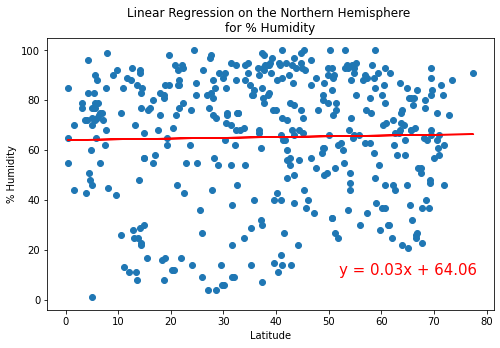

In [18]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


# Call the function
plt.figure(figsize=(8, 5))
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(52,10))

for the Southern Hemisphere

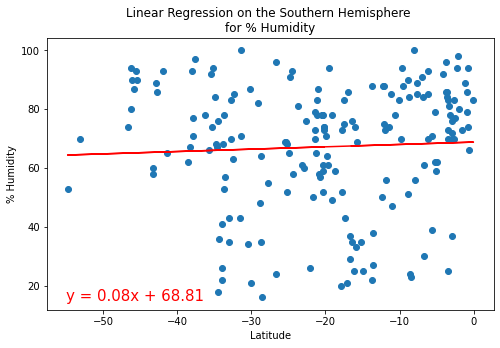

In [19]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


# Call the function
plt.figure(figsize=(8, 5))
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-55,15))

Perform Linear Regression on the Percent Cloudiness

for the Northern Hemisphere

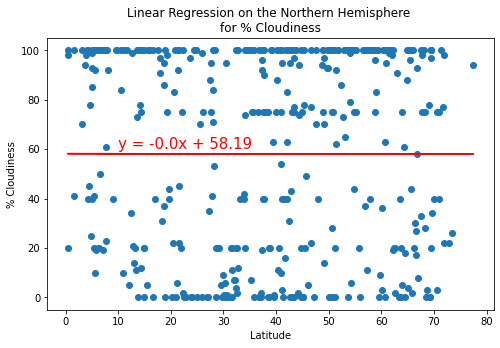

In [31]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


# Call the function
plt.figure(figsize=(8, 5))
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,60))

for the Southern Hemisphere

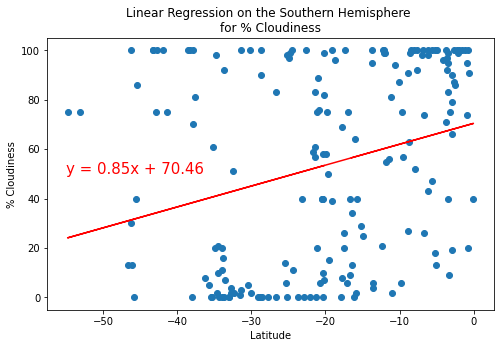

In [33]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


# Call the function
plt.figure(figsize=(8, 5))
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,50))

Perform Linear Regression on the Wind Speed

for the Northern Hemisphere

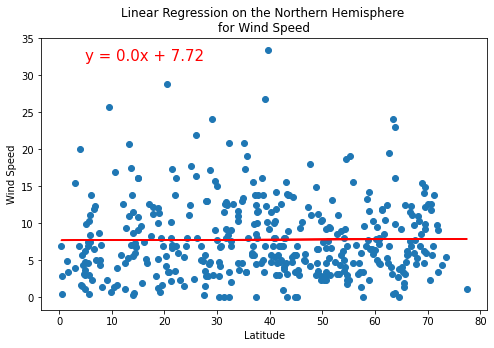

In [45]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


# Call the function
plt.figure(figsize=(8, 5))
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(5,32))

for the Southern Hemisphere

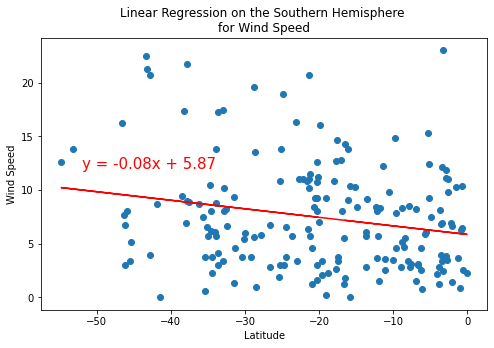

In [44]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


# Call the function
plt.figure(figsize=(8, 5))
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-52, 12))

Set Up Google Maps and Places API

In [47]:
# Store the CSV you saved created in part one into a DataFrame

city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Provideniya,RU,2022-06-07 12:29:07,64.3833,-173.3000,43.41,70,61,2.71
1,1,Albany,US,2022-06-07 12:26:58,42.6001,-73.9662,67.78,54,95,1.01
2,2,Quatre Cocos,MU,2022-06-07 12:29:08,-20.2078,57.7625,76.08,74,82,11.18
3,3,Bredasdorp,ZA,2022-06-07 12:29:08,-34.5322,20.0403,82.51,18,10,6.20
4,4,Umm Kaddadah,SD,2022-06-07 12:29:09,13.6017,26.6876,104.23,8,73,17.47


In [48]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [74]:
# Configure gmaps to use your Google API key

gmaps.configure(api_key = g_key)

Create a Maximum Temperature Heatmap

In [104]:
# Heatmap of temperature

# Get the latitude and longitude
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature
max_temp = city_data_df["Max Temp"]

# Assign the figure variable
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

# Assign the heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer
fig.add_layer(heat_layer)

# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

Create a Percent Humidity Heatmap

In [105]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)


# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

Create a Percent Cloudiness Heatmap

In [106]:
# Heatmap of percent cloudiness

locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)


# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

Create a Wind Speed Heatmap

In [107]:
# Heatmap of wind speed

locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)


# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))


Get Vacation Criteria

a feature on the app that allows customers to search for locations they want to travel based on their temperature preferences

In [109]:
# Ask the customer to add a minimum and maximum temperature value
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

# Filter the dataset to find the cities that fit the criteria
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Quatre Cocos,MU,2022-06-07 12:29:08,-20.2078,57.7625,76.08,74,82,11.18
3,3,Bredasdorp,ZA,2022-06-07 12:29:08,-34.5322,20.0403,82.51,18,10,6.20
5,5,Savona,IT,2022-06-07 12:27:51,44.3000,8.2667,81.52,68,74,4.85
7,7,Auki,SB,2022-06-07 12:29:10,-8.7676,160.7034,77.25,84,63,5.12
11,11,Georgetown,MY,2022-06-07 12:25:23,5.4112,100.3354,83.95,77,20,6.91
14,14,Butaritari,KI,2022-06-07 12:29:13,3.0707,172.7902,81.59,79,70,15.43
15,15,Morondava,MG,2022-06-07 12:29:13,-20.2833,44.2833,79.65,59,58,10.74
18,18,Majene,ID,2022-06-07 12:29:14,-3.5403,118.9707,79.54,86,92,6.85
23,23,Kathu,TH,2022-06-07 12:29:16,7.9178,98.3332,85.69,99,100,7.05
24,24,Beihai,CN,2022-06-07 12:29:16,21.4833,109.1000,80.10,88,100,6.71


In [111]:
# determine if the  preferred_cities_df  DataFrame has any null values for any of the rows
preferred_cities_df.count()

City_ID       208
City          208
Country       205
Date          208
Lat           208
Lng           208
Max Temp      208
Humidity      208
Cloudiness    208
Wind Speed    208
dtype: int64

Map Vacation Criteria

In [112]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates

hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Quatre Cocos,MU,76.08,-20.2078,57.7625,
3,Bredasdorp,ZA,82.51,-34.5322,20.0403,
5,Savona,IT,81.52,44.3000,8.2667,
7,Auki,SB,77.25,-8.7676,160.7034,
11,Georgetown,MY,83.95,5.4112,100.3354,


In [119]:
# Set parameters to search for a hotel

params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [123]:
# Iterate through the DataFrame

for index, row in hotel_df.iterrows():

    # Get the latitude and longitude
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # Make request and get the JSON data from the search
    hotels = requests.get(base_url, params=params).json()

    # Grab the first hotel from the results and store the name
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [124]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Quatre Cocos,MU,76.08,-20.2078,57.7625,Sunrise Attitude Hotel
3,Bredasdorp,ZA,82.51,-34.5322,20.0403,Bredasdorp Country Manor
5,Savona,IT,81.52,44.3000,8.2667,B&B Le Stanze del Moro
7,Auki,SB,77.25,-8.7676,160.7034,Auki Motel
11,Georgetown,MY,83.95,5.4112,100.3354,Cititel Penang
14,Butaritari,KI,81.59,3.0707,172.7902,Isles Sunset Lodge
15,Morondava,MG,79.65,-20.2833,44.2833,La Case Bambou
18,Majene,ID,79.54,-3.5403,118.9707,Kost Putri RABBANI
23,Kathu,TH,85.69,7.9178,98.3332,Novotel Phuket Resort
24,Beihai,CN,80.10,21.4833,109.1000,21 Degree Hostel


Create a Maximum Temperature Heatmap from a Hotel DataFrame

In [125]:
# Add a heatmap of temperature for the vacation spots and marker for each city

locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

add the pop-up markers

In [130]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [131]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city

locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level = 1.5)
heat_layer = gmaps.heatmap_layer(locations, weights = max_temp, dissipating = False, max_intensity = 300, point_radius = 4)
marker_layer = gmaps.marker_layer(locations, info_box_content = hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))